In [34]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('/Users/braydennoh/Documents/Gatech/phase3')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

mpl.rcParams['figure.dpi'] = 1000

file_path = "caonillas.txt"
# Read the data from the file and create a DataFrame
new_data = list(filter(None, [re.split('\s+', i.strip('\n')) for i in open(file_path)]))
df = pd.DataFrame(new_data, columns=['Date', 'Value'])
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Extract the year from the datetime column
df['Year'] = df['Date'].dt.year
# Group the values by year
yearly_data = df.groupby('Year')['Value'].apply(list)

# Initialize an empty array to store the maximum values for each year
max_values = []

# Loop through each year from 1994 to 2022
for year in range(1995, 2022):
    # Access data for the specific year
    data = yearly_data.get(year, [])
    
    # Convert data to numpy array and convert the values to float
    data = np.array(data).astype(float)
    
    # Find the maximum value in the array
    max_value = np.amax(data)
    
    # Append the maximum value to the array
    max_values.append(max_value)

year_range = list(range(1995, 2022))

# Convert the max_values array to numpy array
max_values_m = [value / 35.315 for value in max_values]
result_df = pd.DataFrame({
    'Year': year_range,
    'Max_Value_m': max_values_m
})
# Initialize an empty array to store the maximum values for each year

/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22311/3058694978.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [35]:
result_df

,Year,Max_Value_m
0,1995,10.788617
1,1996,151.776865
2,1997,16.508566
3,1998,40.209543
4,1999,34.829393
5,2000,28.599745
6,2001,36.245222
7,2002,20.586153
8,2003,60.880646
9,2004,57.765822


In [40]:
sort_rain = result_df.sort_values(by =['Max_Value_m'], ascending=False).reset_index(drop=True)
sort_rain

,Year,Max_Value_m
0,1996,151.776865
1,2017,102.789183
2,2011,102.789183
3,2005,91.462551
4,2008,75.888433
5,2010,74.755770
6,2020,62.862806
7,2003,60.880646
8,2007,60.031148
9,2004,57.765822


In [41]:
rank = np.zeros((len(sort_rain), 3))
for i in range(len(sort_rain)):
    rank[i, 0] = i + 1
    rank[i, 1] = (i + 1)/(len(sort_rain)+1)
    rank[i, 2] = 1/rank[i, 1]

rank = pd.DataFrame(rank, columns=['rank', 'probability', 'return_year'])
rank[['rank', 'return_year']] = rank[['rank', 'return_year']].astype(int)
rank_rain = pd.concat([sort_rain, rank], axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


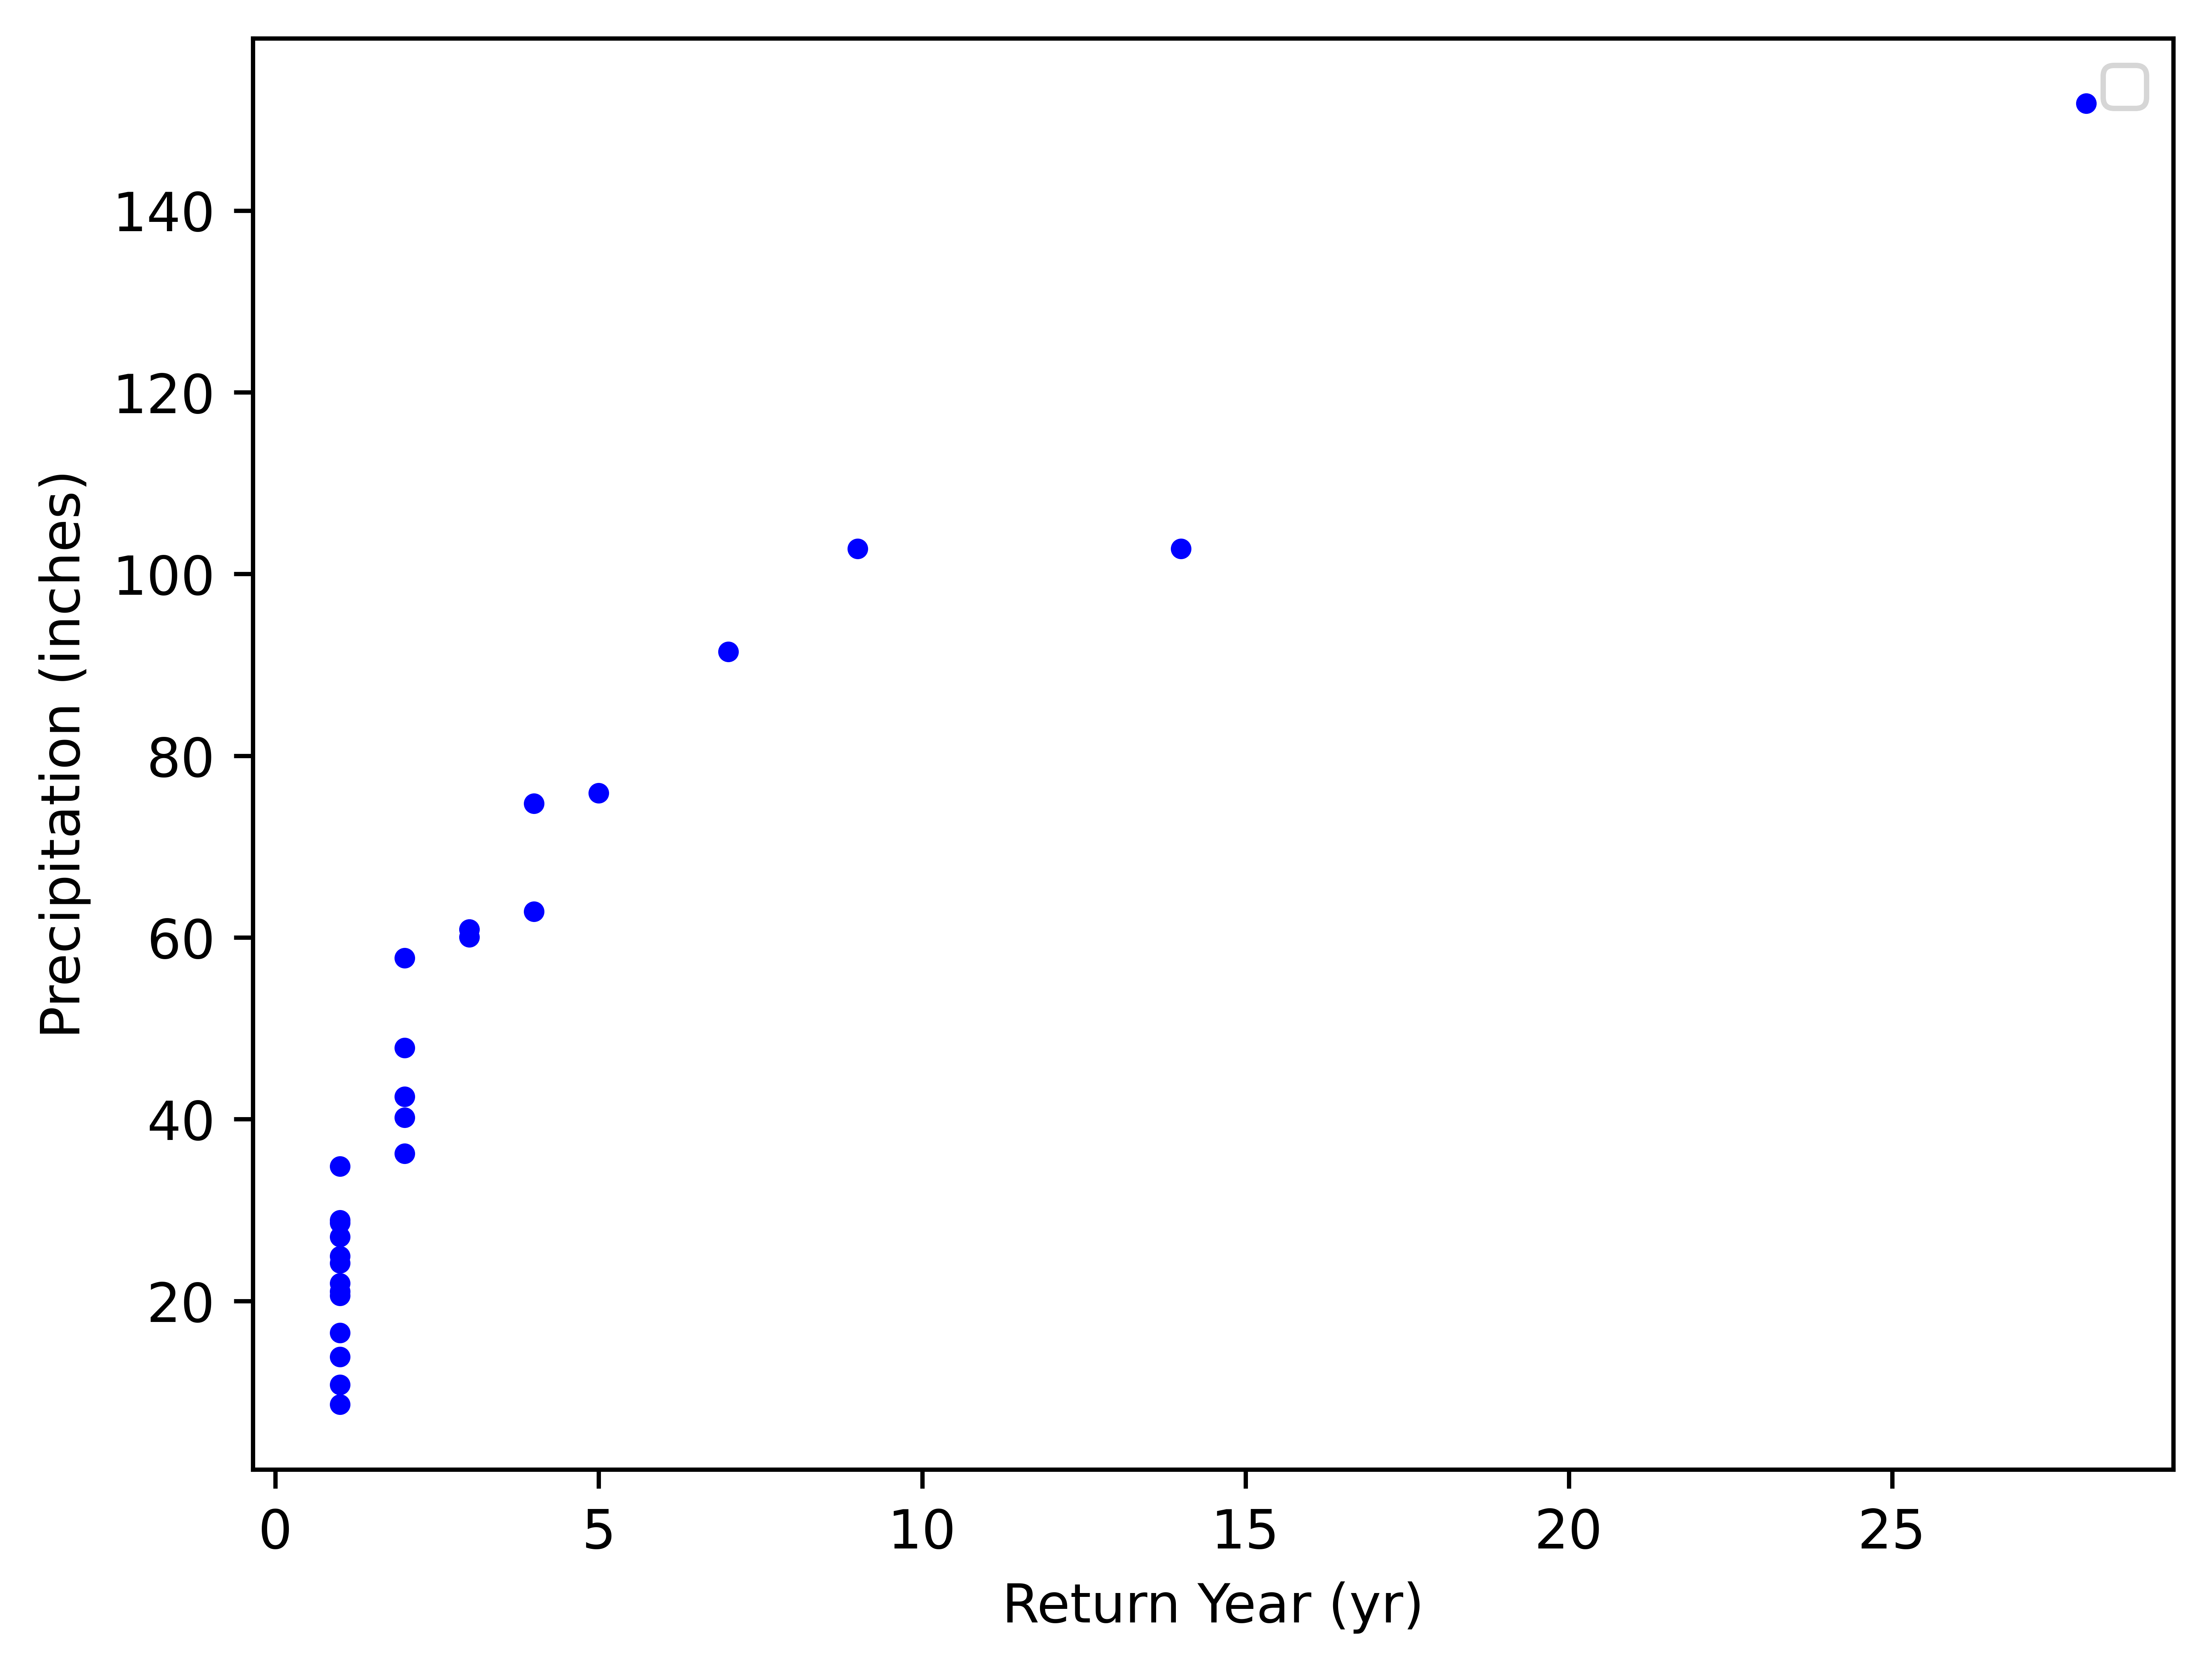

In [43]:
plt.scatter(rank_rain['return_year'], rank_rain['Max_Value_m'], s=8, color = 'b')
plt.legend()
plt.xlabel('Return Year (yr)')
plt.ylabel('Precipitation (inches)')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       Normal      Gumbel  LogPerason  Year  Max_Value_m  rank  probability  \
0  108.566640  119.737014  132.534636  1996   151.776865     1     0.035714   
1   97.183137  101.017242  105.310575  2017   102.789183     2     0.071429   
2   88.933497   88.833013   89.025992  2011   102.789183     3     0.107143   
3   83.770763   81.756691   80.095499  2005    91.462551     4     0.142857   
4   76.149952   72.029614   68.467625  2008    75.888433     5     0.178571   

   return_year  
0           28  
1           14  
2            9  
3            7  
4            5  


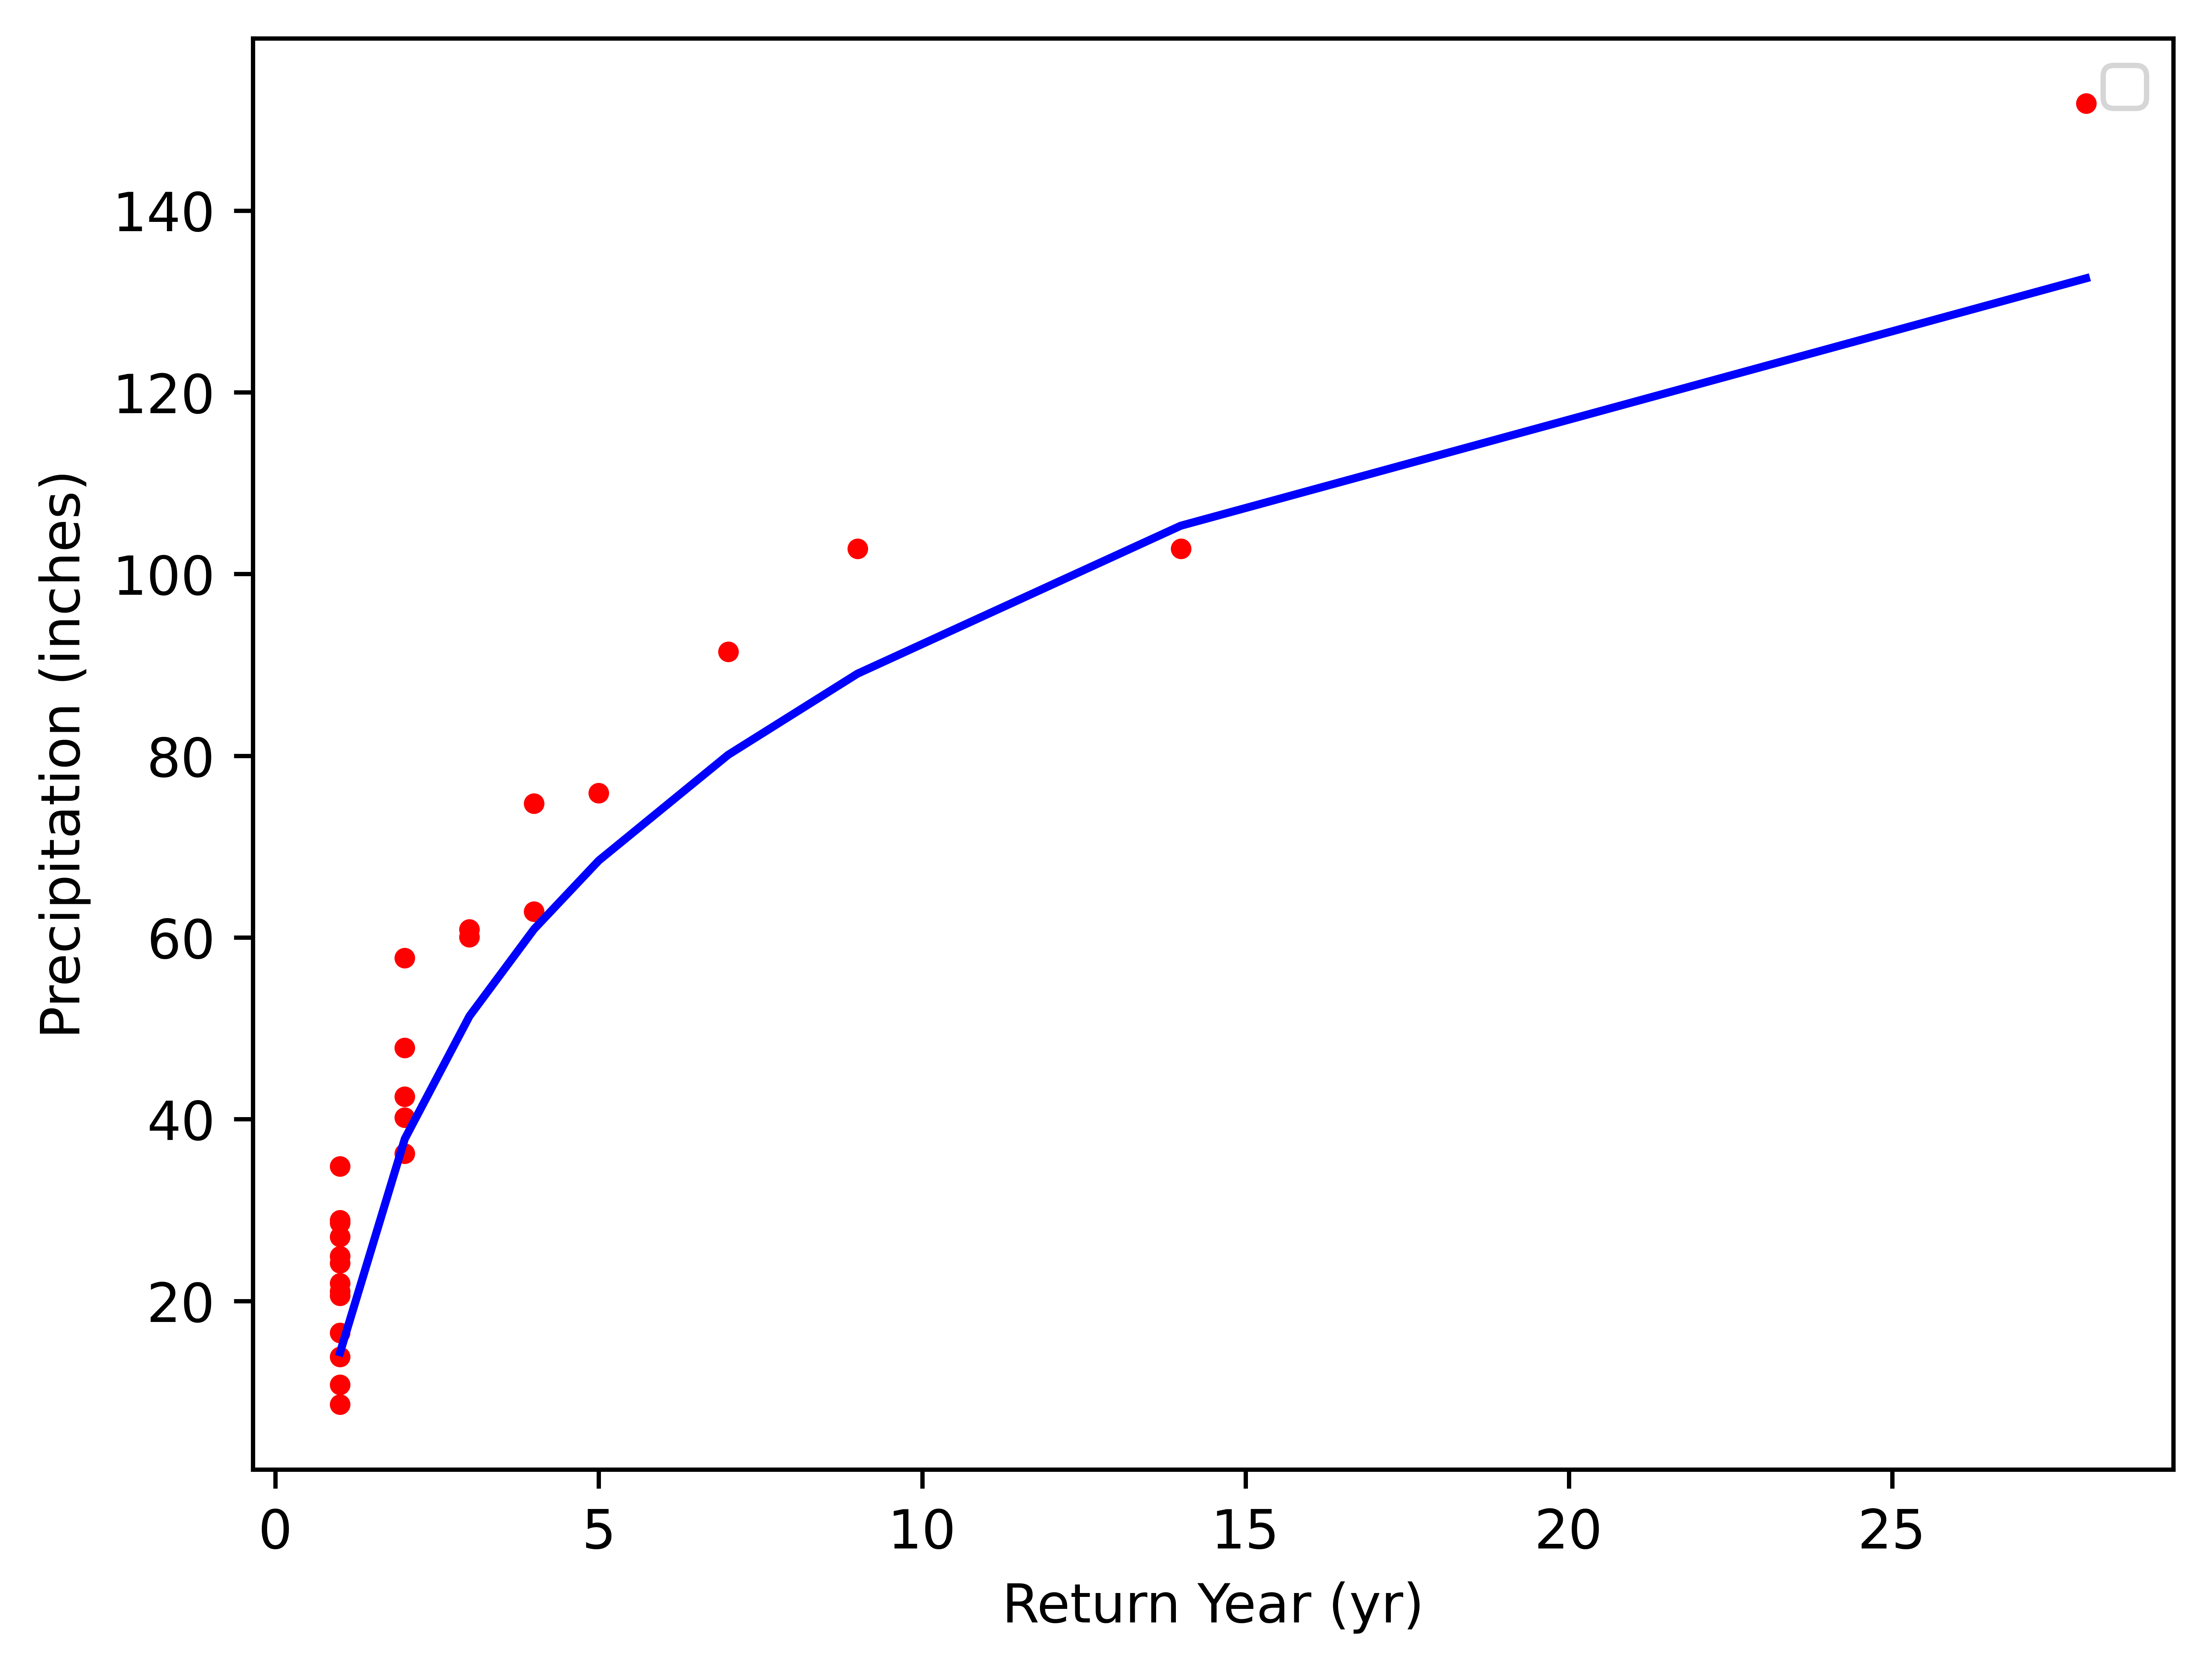

In [111]:
rain = np.array(rank_rain['Max_Value_m'])
std = np.std(rain)
u = np.mean(rain)
skew = sp.skew(np.log10(rain))
re_year = np.array(rank_rain['return_year'])

z = np.zeros(len(re_year))
k3 = np.zeros(len(re_year))
lp3 = np.zeros(len(re_year))

for i in range(len(k3)):
    if re_year[i] != 1:
        z[i] = sp.norm.ppf(1-(1/re_year[i]))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log(re_year[i]/(re_year[i]-1)))) 
    else:
        z[i] = sp.norm.ppf(1-(1/(re_year[i]+0.1)))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log((re_year[i]+0.1)/(re_year[i]+0.1-1))))
    lp3[i] = 2/skew * (np.power((z[i] - skew/6)*skew/6+1, 3)-1)
    
model_rain = np.zeros((len(rain), 3))
for i in range(len(model_rain)):
    model_rain[i][0] = u + z[i]* std
    model_rain[i][1] = u + k3[i] * std
    model_rain[i][2] = np.power(10, np.mean(np.log10(rain)) + lp3[i] * np.std(np.log10(rain)))
pd_rain = pd.DataFrame(model_rain, columns=['Normal', 'Gumbel', 'LogPerason'])
total_rain = pd.concat([pd_rain, rank_rain], axis=1)
print(total_rain.head(5))

plt.plot(total_rain['return_year'], total_rain['LogPerason'], color = 'b')
plt.scatter(total_rain['return_year'], total_rain['Max_Value_m'], s=8, color= 'r')
plt.legend()
plt.xlabel('Return Year (yr)')
plt.ylabel('Precipitation (inches)')
plt.show()

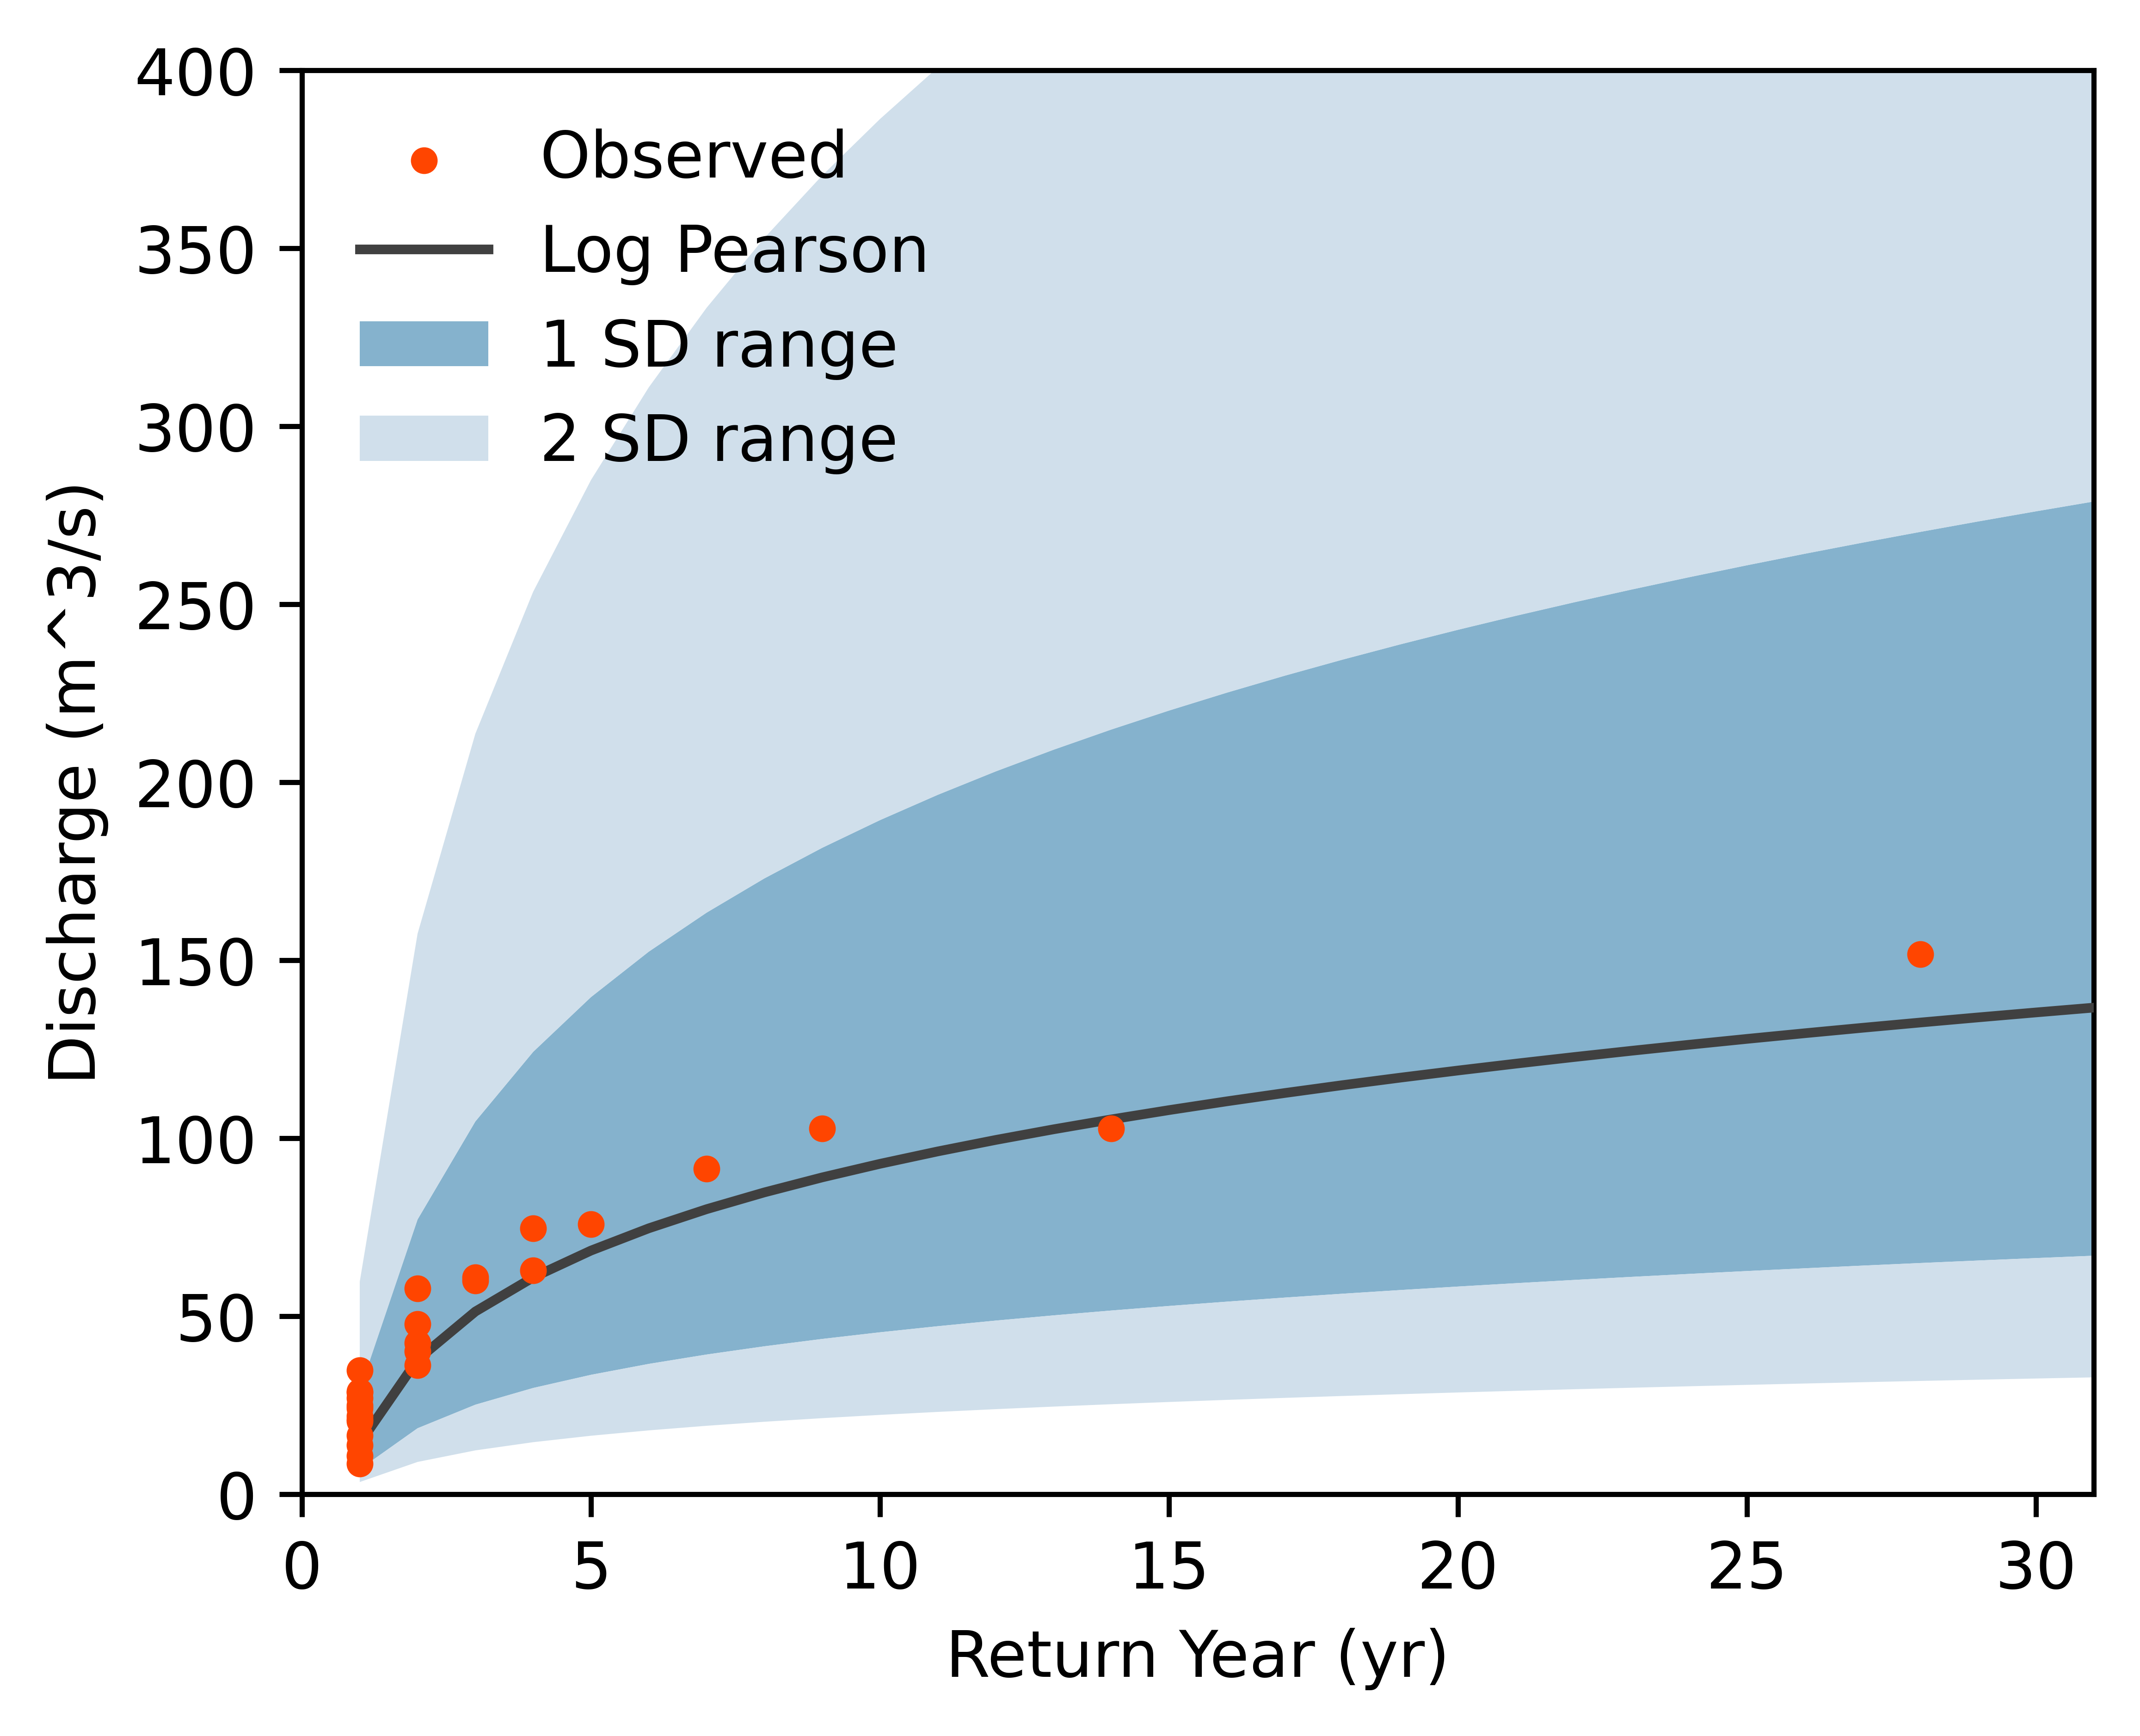

In [110]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

# Assuming rank_rain is already defined or provided before this
rain = np.array(rank_rain['Max_Value_m'])
std = np.std(rain)
u = np.mean(rain)
skew = sp.skew(np.log10(rain))

# Extending the return years to 100
extended_re_year = np.arange(1, 51)

z = np.zeros(len(extended_re_year))
k3 = np.zeros(len(extended_re_year))
lp3 = np.zeros(len(extended_re_year))

for i in range(len(extended_re_year)):
    if extended_re_year[i] != 1:
        z[i] = sp.norm.ppf(1 - (1/extended_re_year[i]))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log(extended_re_year[i] / (extended_re_year[i]-1)))) 
    else:
        z[i] = sp.norm.ppf(1-(1/(extended_re_year[i]+0.1)))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log((extended_re_year[i]+0.1)/(extended_re_year[i]+0.1-1))))
    lp3[i] = 2/skew * (np.power((z[i] - skew/6)*skew/6+1, 3)-1)

# Standard deviation for log-transformed data
std_log = np.std(np.log10(rain))

extended_model_rain = np.zeros((len(extended_re_year), 7))
for i in range(len(extended_model_rain)):
    extended_model_rain[i][0] = u + z[i]* std
    extended_model_rain[i][1] = u + k3[i] * std
    extended_model_rain[i][2] = np.power(10, np.mean(np.log10(rain)) + lp3[i] * std_log)
    extended_model_rain[i][3] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] + 1) * std_log)
    extended_model_rain[i][4] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] - 1) * std_log)
    extended_model_rain[i][5] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] + 2) * std_log)
    extended_model_rain[i][6] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] - 2) * std_log)

# Creating a DataFrame for extended data
extended_pd_rain = pd.DataFrame(extended_model_rain, columns=['Normal', 'Gumbel', 'LogPearson', 'LogPearson+1SD', 'LogPearson-1SD', 'LogPearson+2SD', 'LogPearson-2SD'])

fig, ax1 = plt.subplots(figsize=(5, 4))

# Plotting
plt.scatter(rank_rain['return_year'], rank_rain['Max_Value_m'], s=10, color='orangered', label='Observed',zorder=100)
plt.plot(extended_re_year, extended_pd_rain['LogPearson'], color='#404040', label='Log Pearson',linestyle="-",zorder=50)

# Shading between curves
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson-1SD'], extended_pd_rain['LogPearson+1SD'], color='#78aac8', alpha=0.9, lw = 0,label='1 SD range')
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson-2SD'], extended_pd_rain['LogPearson-1SD'], color='#cbdce9', alpha=0.9,lw = 0,label='2 SD range')
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson+1SD'], extended_pd_rain['LogPearson+2SD'], color='#cbdce9', alpha=0.9,lw = 0)

plt.legend()
plt.xlabel('Return Year (yr)')
plt.ylabel('Discharge (m^3/s)')
plt.xlim([0, 31])
plt.ylim([0, 400])
plt.legend(loc="upper left", frameon=False)  # Set the legend to top left and remove the frame
plt.show()


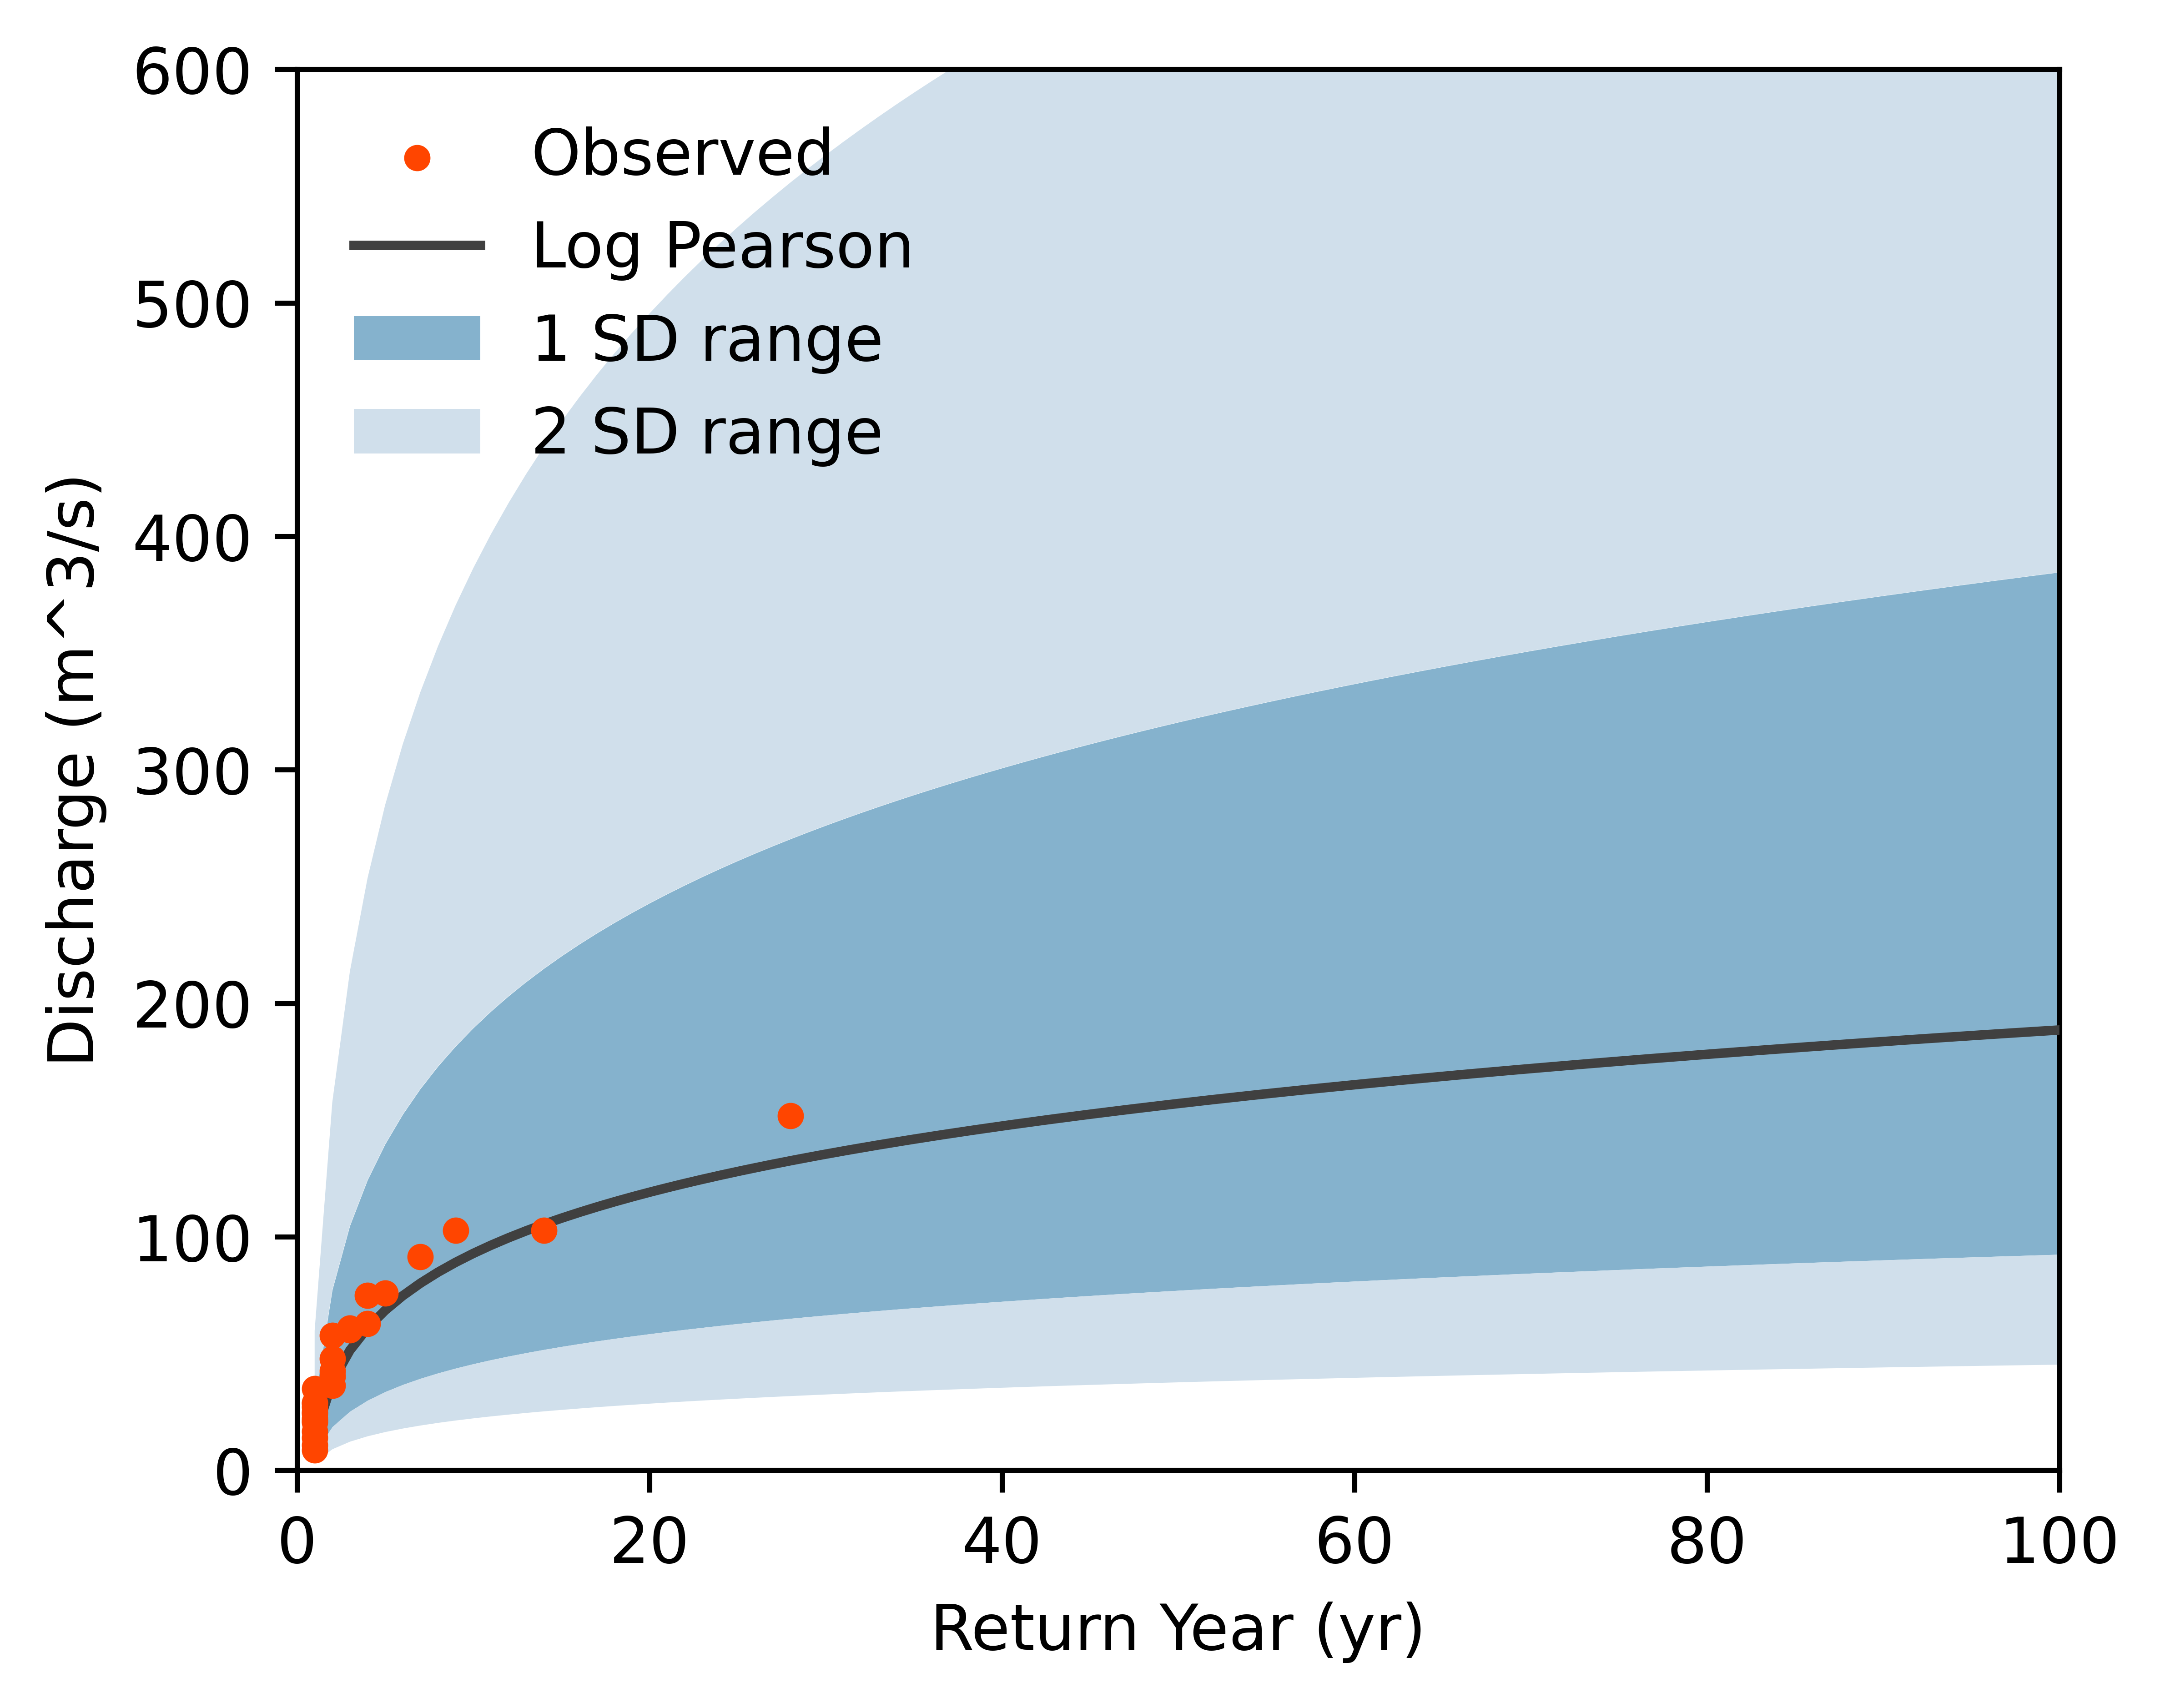

In [106]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

# Assuming rank_rain is already defined or provided before this
rain = np.array(rank_rain['Max_Value_m'])
std = np.std(rain)
u = np.mean(rain)
skew = sp.skew(np.log10(rain))

# Extending the return years to 100
extended_re_year = np.arange(1, 101)

z = np.zeros(len(extended_re_year))
k3 = np.zeros(len(extended_re_year))
lp3 = np.zeros(len(extended_re_year))

for i in range(len(extended_re_year)):
    if extended_re_year[i] != 1:
        z[i] = sp.norm.ppf(1 - (1/extended_re_year[i]))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log(extended_re_year[i] / (extended_re_year[i]-1)))) 
    else:
        z[i] = sp.norm.ppf(1-(1/(extended_re_year[i]+0.1)))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log((extended_re_year[i]+0.1)/(extended_re_year[i]+0.1-1))))
    lp3[i] = 2/skew * (np.power((z[i] - skew/6)*skew/6+1, 3)-1)

# Standard deviation for log-transformed data
std_log = np.std(np.log10(rain))

extended_model_rain = np.zeros((len(extended_re_year), 7))
for i in range(len(extended_model_rain)):
    extended_model_rain[i][0] = u + z[i]* std
    extended_model_rain[i][1] = u + k3[i] * std
    extended_model_rain[i][2] = np.power(10, np.mean(np.log10(rain)) + lp3[i] * std_log)
    extended_model_rain[i][3] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] + 1) * std_log)
    extended_model_rain[i][4] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] - 1) * std_log)
    extended_model_rain[i][5] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] + 2) * std_log)
    extended_model_rain[i][6] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] - 2) * std_log)

# Creating a DataFrame for extended data
extended_pd_rain = pd.DataFrame(extended_model_rain, columns=['Normal', 'Gumbel', 'LogPearson', 'LogPearson+1SD', 'LogPearson-1SD', 'LogPearson+2SD', 'LogPearson-2SD'])

fig, ax1 = plt.subplots(figsize=(5, 4))

# Plotting
plt.scatter(rank_rain['return_year'], rank_rain['Max_Value_m'], s=10, color='orangered', label='Observed',zorder=100)
plt.plot(extended_re_year, extended_pd_rain['LogPearson'], color='#404040', label='Log Pearson',linestyle="-",zorder=50)

# Shading between curves
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson-1SD'], extended_pd_rain['LogPearson+1SD'], color='#78aac8', alpha=0.9, lw = 0,label='1 SD range')
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson-2SD'], extended_pd_rain['LogPearson-1SD'], color='#cbdce9', alpha=0.9,lw = 0,label='2 SD range')
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson+1SD'], extended_pd_rain['LogPearson+2SD'], color='#cbdce9', alpha=0.9,lw = 0)

plt.legend()
plt.xlabel('Return Year (yr)')
plt.ylabel('Discharge (m^3/s)')
plt.xlim([0, 100])
plt.ylim([0, 600])
plt.legend(loc="upper left", frameon=False)  # Set the legend to top left and remove the frame
plt.show()


/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_22311/3990900016.py:60: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 1000])


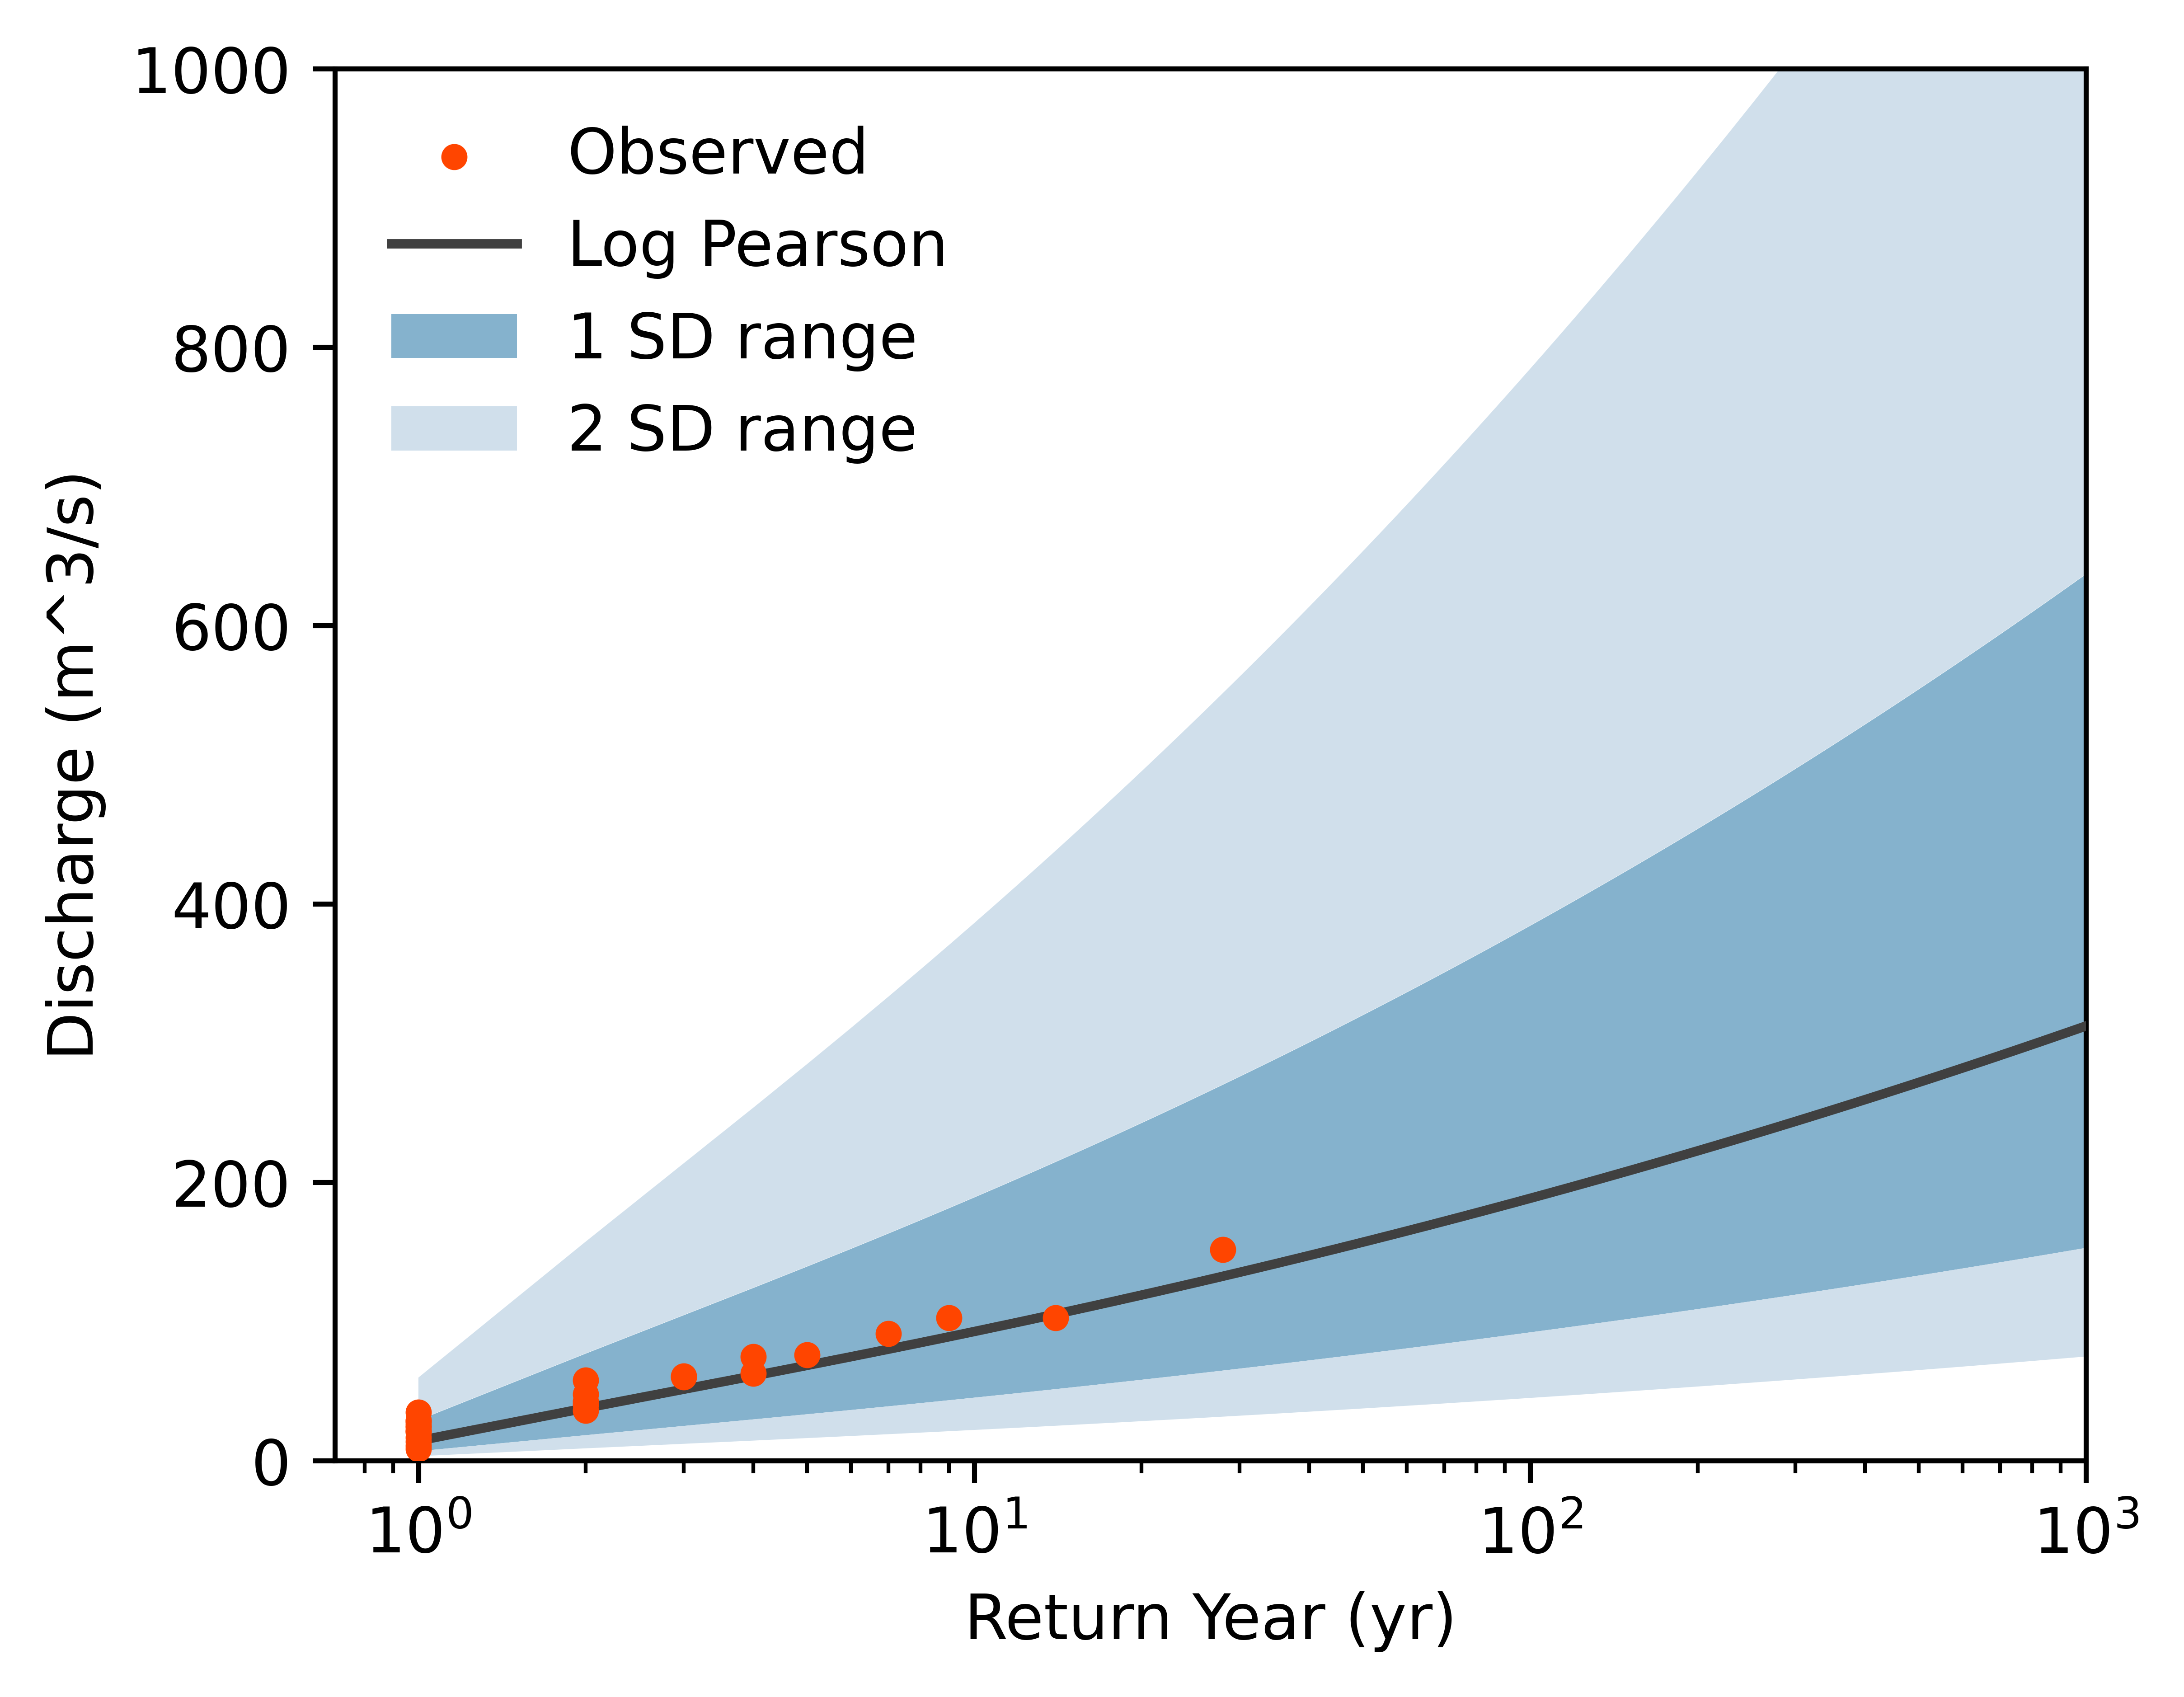

In [108]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt

# Assuming rank_rain is already defined or provided before this
rain = np.array(rank_rain['Max_Value_m'])
std = np.std(rain)
u = np.mean(rain)
skew = sp.skew(np.log10(rain))

# Extending the return years to 100
extended_re_year = np.arange(1, 1001)

z = np.zeros(len(extended_re_year))
k3 = np.zeros(len(extended_re_year))
lp3 = np.zeros(len(extended_re_year))

for i in range(len(extended_re_year)):
    if extended_re_year[i] != 1:
        z[i] = sp.norm.ppf(1 - (1/extended_re_year[i]))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log(extended_re_year[i] / (extended_re_year[i]-1)))) 
    else:
        z[i] = sp.norm.ppf(1-(1/(extended_re_year[i]+0.1)))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log((extended_re_year[i]+0.1)/(extended_re_year[i]+0.1-1))))
    lp3[i] = 2/skew * (np.power((z[i] - skew/6)*skew/6+1, 3)-1)

# Standard deviation for log-transformed data
std_log = np.std(np.log10(rain))

extended_model_rain = np.zeros((len(extended_re_year), 7))
for i in range(len(extended_model_rain)):
    extended_model_rain[i][0] = u + z[i]* std
    extended_model_rain[i][1] = u + k3[i] * std
    extended_model_rain[i][2] = np.power(10, np.mean(np.log10(rain)) + lp3[i] * std_log)
    extended_model_rain[i][3] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] + 1) * std_log)
    extended_model_rain[i][4] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] - 1) * std_log)
    extended_model_rain[i][5] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] + 2) * std_log)
    extended_model_rain[i][6] = np.power(10, np.mean(np.log10(rain)) + (lp3[i] - 2) * std_log)

# Creating a DataFrame for extended data
extended_pd_rain = pd.DataFrame(extended_model_rain, columns=['Normal', 'Gumbel', 'LogPearson', 'LogPearson+1SD', 'LogPearson-1SD', 'LogPearson+2SD', 'LogPearson-2SD'])

fig, ax1 = plt.subplots(figsize=(5, 4))

# Plotting
plt.scatter(rank_rain['return_year'], rank_rain['Max_Value_m'], s=10, color='orangered', label='Observed',zorder=100)
plt.plot(extended_re_year, extended_pd_rain['LogPearson'], color='#404040', label='Log Pearson',linestyle="-",zorder=50)

# Shading between curves
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson-1SD'], extended_pd_rain['LogPearson+1SD'], color='#78aac8', alpha=0.9, lw = 0,label='1 SD range')
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson-2SD'], extended_pd_rain['LogPearson-1SD'], color='#cbdce9', alpha=0.9,lw = 0,label='2 SD range')
plt.fill_between(extended_re_year, extended_pd_rain['LogPearson+1SD'], extended_pd_rain['LogPearson+2SD'], color='#cbdce9', alpha=0.9,lw = 0)

plt.xscale('log') 

plt.legend()
plt.xlabel('Return Year (yr)')
plt.ylabel('Discharge (m^3/s)')
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.legend(loc="upper left", frameon=False)  # Set the legend to top left and remove the frame
plt.show()